In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import geopandas as gpd
from operator import itemgetter
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Get the station data -
ndata = pd.read_csv("cleaned_data/nyc_subway_stations_with_lines")

In [3]:
ndata.head(3)

,Unnamed: 0,stop_id,stop_name,stop_lat,stop_lon,Borough,Daytime Routes
0,0,101,Van Cortlandt Park - 242 St,40.889248,-73.898583,Bx,1
1,1,103,238 St,40.884667,-73.900870,Bx,1
2,2,104,231 St,40.878856,-73.904834,Bx,1


In [41]:
#initialize the graph
#G.clear()
G = nx.MultiDiGraph(name='NYC Subway Network')

In [42]:
#add nodes and attributes
for i in range(0,len(ndata)):
    G.add_node(ndata.stop_id[i],
               name = ndata.stop_name[i],
               line = ndata['Daytime Routes'][i],
               boro = ndata.Borough[i],
               lat = ndata.stop_lat[i],
               lng = ndata.stop_lon[i],
               geo = (ndata.stop_lon[i],ndata.stop_lat[i])
              )

In [43]:
#show the nodes in G
G.nodes(data=True)[:3]

[('G26',
  {'boro': 'Bk',
   'geo': (-73.954448999999997, 40.731352000000001),
   'lat': 40.731352000000001,
   'line': 'G',
   'lng': -73.954448999999997,
   'name': 'Greenpoint Av'}),
 ('G24',
  {'boro': 'Q',
   'geo': (-73.949724000000003, 40.744064999999999),
   'lat': 40.744064999999999,
   'line': 'G',
   'lng': -73.949724000000003,
   'name': '21 St'}),
 ('G22',
  {'boro': 'Q',
   'geo': (-73.943832, 40.746553999999996),
   'lat': 40.746553999999996,
   'line': 'G',
   'lng': -73.943832,
   'name': 'Court Sq'})]

In [45]:
#get the edge data and attributes
edata = pd.read_csv("cleaned_data/duration_between_stops(7am-10am,weekday)")

In [8]:
edata.head(2)

,Unnamed: 0,from_stop_id,to_stop_id,train,duration,from_stop_name,from_stop_lat,from_stop_lon,to_stop_name,to_stop_lat,to_stop_lon
0,0,101S,103S,1,90.0,Van Cortlandt Park - 242 St,40.889248,-73.898583,238 St,40.884667,-73.900870
1,1,103N,101N,1,90.0,238 St,40.884667,-73.900870,Van Cortlandt Park - 242 St,40.889248,-73.898583


In [46]:
#add node id to edge data
edata['from_node_id']= edata['from_stop_id'].str[:3]
edata['to_node_id']= edata['to_stop_id'].str[:3]

In [47]:
edata.head(2)

,Unnamed: 0,from_stop_id,to_stop_id,train,duration,from_stop_name,from_stop_lat,from_stop_lon,to_stop_name,to_stop_lat,to_stop_lon,from_node_id,to_node_id
0,0,101S,103S,1,90.0,Van Cortlandt Park - 242 St,40.889248,-73.898583,238 St,40.884667,-73.900870,101,103
1,1,103N,101N,1,90.0,238 St,40.884667,-73.900870,Van Cortlandt Park - 242 St,40.889248,-73.898583,103,101


In [48]:
# #ADD THE EDGES and weighted -method 1
for i in range(0,len(edata.from_node_id)):
    G.add_edge(edata.from_node_id[i],edata.to_node_id[i], 
               weight = edata.duration[i],
               ## attributes
               train = edata.train[i])
# # add weighted edges  - method 2
# e= zip(edata.from_node_id,edata.to_node_id,edata.duration)
# G.add_weighted_edges_from(e,train=edata.train)

In [49]:
G.edges(data= True)[:3]

[('G26', 'G24', {'train': 'G', 'weight': 150.0}),
 ('G26', 'G28', {'train': 'G', 'weight': 90.0}),
 ('G24', 'G26', {'train': 'G', 'weight': 180.0})]

In [50]:
#ADD TRANSFER WITHOUT SWIPE EDGES
tdata = pd.read_csv("cleaned_data/transfer_without_swipe")
tdata.head(3)

,Unnamed: 0,from_stop_id,to_stop_id,transfer_type,min_transfer_time,from_stop,to_stop,from_line,to_line
0,0,112,A09,2,180,168 St - Washington Hts,168 St,1,A
1,1,112,A09,2,180,168 St - Washington Hts,168 St,1,C
2,2,120,120,2,180,96 St,96 St,1,2


In [51]:
## adding transfer
for i in range(0,len(tdata.from_stop_id)):
    G.add_edge(tdata.from_stop_id[i],tdata.to_stop_id[i],
               weight = tdata.min_transfer_time[i],
               ## attributes
               from_train = tdata.from_line[i],
               to_train = tdata.to_line[i])
    
# ## method 2- add self loop
# e2= zip(tdata.from_stop_id,tdata.to_stop_id,tdata.min_transfer_time)
# G.add_weighted_edges_from(e)

In [52]:
G.edges(data= True)[:10]

[('G26', 'G24', {'train': 'G', 'weight': 150.0}),
 ('G26', 'G28', {'train': 'G', 'weight': 90.0}),
 ('G24', 'G26', {'train': 'G', 'weight': 180.0}),
 ('G24', 'G22', {'train': 'G', 'weight': 60.0}),
 ('G22', 'G24', {'train': 'G', 'weight': 60.0}),
 ('G22', 'F09', {'from_train': 'G', 'to_train': 'E', 'weight': 180}),
 ('G22', 'F09', {'from_train': 'G', 'to_train': 'M', 'weight': 180}),
 ('G22', '719', {'from_train': 'G', 'to_train': '7', 'weight': 180}),
 ('G20', 'G20', {'from_train': 'M', 'to_train': 'R', 'weight': 180}),
 ('G20', 'G20', {'from_train': 'R', 'to_train': 'M', 'weight': 180})]

In [53]:
print nx.info(G)

Name: NYC Subway Network
Type: MultiDiGraph
Number of nodes: 498
Number of edges: 2759
Average in degree:   5.5402
Average out degree:   5.5402


In [57]:
print 'NO SERVICE IN THOSE STATIONS: '
print filter(lambda x: x[1]==0, G.degree().items())

NO SERVICE IN THOSE STATIONS: 
[('M10', 0), ('S12', 0), ('S10', 0), ('M09', 0)]


In [59]:
station = pd.read_csv('GTFS_nyc_subway/stops.txt')

In [62]:
station[station['stop_id'].isin(['M10','M09','S12','S10'])][['stop_id','stop_name']]

,stop_id,stop_name
1221,M09,Knickerbocker Av
1224,M10,Central Av
1431,S10,Atlantic
1437,S12,Nassau


In [63]:
nyc = gpd.read_file('nyc_borough_boundry_17b/nybb.shp').to_crs(epsg=4326)

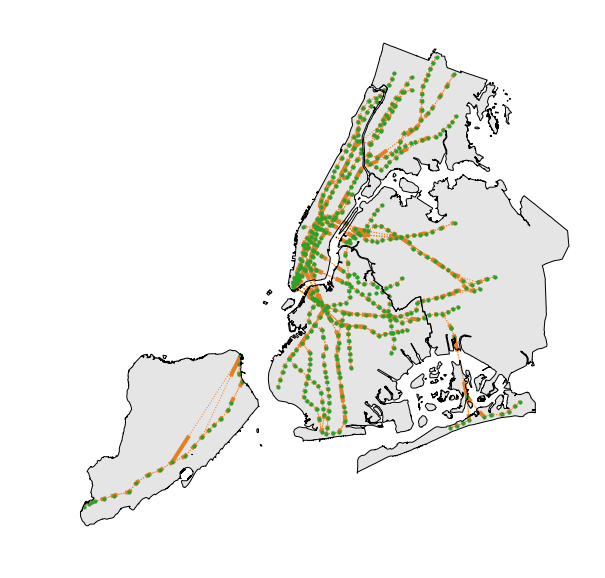

In [64]:
plt.figure(figsize=(10,10))
ax= plt.subplot()
nyc.plot(ax=ax,color= 'grey',alpha=0.2)

location = nx.get_node_attributes(G,'geo')
plt.axis("off")
nx.draw_networkx(G,
                 pos = location,
                 with_labels =False,
                 node_size = 10,
                 style = 'dotted',
                 node_color= 'C2',
                 edge_color= 'C1')

In [104]:
sorted(nx.betweenness_centrality(G).items(),key=lambda x: x[1],reverse=True)[:10]
stop_id = map(lambda x: x[0],important_nodes)
stop_name = ndata[ndata['stop_id'].isin(stop_id)]['stop_name'].values
print zip(stop_id,stop_name)

[('R20', '125 St'), ('Q01', '125 St'), ('629', '125 St'), ('631', '86 St'), ('635', '86 St'), ('R31', '86 St'), ('621', '59 St'), ('626', '59 St'), ('A46', '59 St'), ('A42', 'Grand Central - 42 St')]


In [119]:
G_important.nodes(data=True)

[('631',
  {'boro': 'M',
   'geo': (-73.976848000000004, 40.751776),
   'lat': 40.751776,
   'line': '4',
   'lng': -73.976848000000004,
   'name': array(['Grand Central - 42 St', 'Grand Central - 42 St',
          'Grand Central - 42 St'], dtype=object)}),
 ('621',
  {'boro': 'M',
   'geo': (-73.93759399999999, 40.804138000000002),
   'lat': 40.804138000000002,
   'line': '4',
   'lng': -73.93759399999999,
   'name': array(['125 St', '125 St', '125 St'], dtype=object)}),
 ('635',
  {'boro': 'M',
   'geo': (-73.989951000000005, 40.734673000000001),
   'lat': 40.734673000000001,
   'line': '4',
   'lng': -73.989951000000005,
   'name': array(['14 St - Union Sq', '14 St - Union Sq', '14 St - Union Sq'], dtype=object)}),
 ('629',
  {'boro': 'M',
   'geo': (-73.967967000000002, 40.762526000000001),
   'lat': 40.762526000000001,
   'line': '4',
   'lng': -73.967967000000002,
   'name': array(['59 St', '59 St', '59 St'], dtype=object)}),
 ('A46',
  {'boro': 'Bk',
   'geo': (-73.9504260000000

In [109]:
ndata[ndata['stop_id']==stop_id[i]]#['stop_lat'].values[0]

,Unnamed: 0,stop_id,stop_name,stop_lat,stop_lon,Borough,Daytime Routes
319,319,A42,Hoyt - Schermerhorn Sts,40.688484,-73.985001,Bk,A
320,320,A42,Hoyt - Schermerhorn Sts,40.688484,-73.985001,Bk,C
321,321,A42,Hoyt - Schermerhorn Sts,40.688484,-73.985001,Bk,G


[(0, ('631', 'Grand Central - 42 St')), (1, ('621', '125 St')), (2, ('635', '14 St - Union Sq')), (3, ('629', '59 St')), (4, ('A46', 'Nostrand Av')), (5, ('626', '86 St')), (6, ('A42', 'Hoyt - Schermerhorn Sts')), (7, ('Q01', 'Canal St')), (8, ('R31', 'Atlantic Av - Barclays Ctr')), (9, ('R20', '14 St - Union Sq'))]


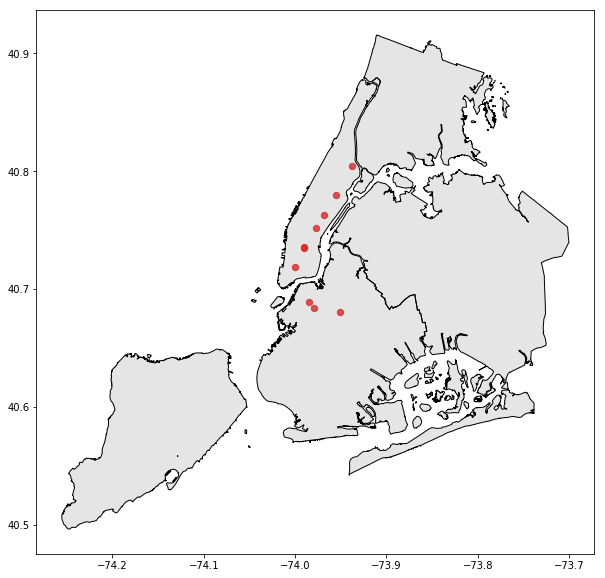

In [134]:
important_nodes = sorted(nx.betweenness_centrality(G).items(),key=lambda x: x[1],reverse=True)[:10]
length = 10
stop_id = map(lambda x: x[0],important_nodes)
stop_name={}
for i in stop_id:
    stop_name[i]= ndata[ndata['stop_id']==i]['stop_name'].values[0]
G_important= nx.MultiDiGraph(name='important nodes in NYC Subway Network')
for i in range(0,length):
    G_important.add_node(stop_id[i],
               name = ndata[ndata['stop_id']==stop_id[i]]['stop_name'].values[0],
               line = ndata[ndata['stop_id']==stop_id[i]]['Daytime Routes'].values[0],
               boro = ndata[ndata['stop_id']==stop_id[i]]['Borough'].values[0],
               lat = ndata[ndata['stop_id']==stop_id[i]]['stop_lat'].values[0],
               lng = ndata[ndata['stop_id']==stop_id[i]]['stop_lon'].values[0],
               geo = (ndata[ndata['stop_id']==stop_id[i]]['stop_lon'].values[0],
                      ndata[ndata['stop_id']==stop_id[i]]['stop_lat'].values[0])
              )

    
    
plt.figure(figsize=(10,10))
ax= plt.subplot()
nyc.plot(ax=ax,color= 'grey',alpha=0.2)
   
location_I = nx.get_node_attributes(G_important,'geo')
nx.draw_networkx(G_important,
                 pos = location_I,
                 with_labels =False,
                 node_size = 40,
                 style = 'dotted',
                 node_color= 'C3',
                 edge_color= 'C1',
                 alpha=0.8)
print zip(range(length),stop_name.items())

In [135]:
def most_important(G, centrality='betweenness',length=10):
    """
    G is network graph
    centrality could be: betweenness, degree ,closeness
    length = 10 is to select top 10 nodes of highest centrality 
    """
    if centrality == 'betweenness':
        important_nodes = sorted(nx.betweenness_centrality(G).items(),key=lambda x: x[1],reverse=True)[:length]
    if centrality == 'degree':
        important_nodes = sorted(nx.degree_centrality(G).items(),key=lambda x: x[1],reverse=True)[:length]
    if centrality == 'closeness':
        important_nodes = sorted(nx.closeness_centrality(G).items(),key=lambda x: x[1],reverse=True)[:length]
    
    stop_id = map(lambda x: x[0],important_nodes)
    stop_name=[]
    for i in stop_id:
        stop_name.append(ndata[ndata['stop_id']==i]['stop_name'].values[0])
        
    ## build up the new network, with only import nodes
    G_important= nx.MultiDiGraph(name='important nodes in NYC Subway Network')
    for i in range(0,length):
        G_important.add_node(stop_id[i],
               name = ndata[ndata['stop_id']==stop_id[i]]['stop_name'].values,
               line = ndata[ndata['stop_id']==stop_id[i]]['Daytime Routes'].values,
               boro = ndata[ndata['stop_id']==stop_id[i]]['Borough'].values[0],
               lat = ndata[ndata['stop_id']==stop_id[i]]['stop_lat'].values[0],
               lng = ndata[ndata['stop_id']==stop_id[i]]['stop_lon'].values[0],
               geo = (ndata[ndata['stop_id']==stop_id[i]]['stop_lon'].values[0],
                      ndata[ndata['stop_id']==stop_id[i]]['stop_lat'].values[0])
              )
    # plot the important nodes out
    
    ## base map of nyc
    plt.figure(figsize=(10,10))
    ax= plt.subplot()
    nyc.plot(ax=ax,color= 'grey',alpha=0.2)
    
    ## network
    location = nx.get_node_attributes(G,'geo')
    plt.axis("off")
    nx.draw_networkx(G,
                 pos = location,
                 with_labels =False,
                 node_size = 10,
                 style = 'dotted',
                 node_color= 'C2',
                 edge_color= 'C1')
    ## the important nodes
    location_I = nx.get_node_attributes(G_important,'geo')
    nx.draw_networkx(G_important,
                 pos = location_I,
                 with_labels =False,
                 node_size = 40,
                 style = 'dotted',
                 node_color= 'C3',
                 edge_color= 'C1',
                 alpha=0.8)
    
    return zip(range(1,length+1),stop_name)

[(1, '14 St - Union Sq'),
 (2, 'Canal St'),
 (3, '59 St'),
 (4, 'Grand Central - 42 St'),
 (5, '14 St - Union Sq'),
 (6, 'Atlantic Av - Barclays Ctr'),
 (7, '125 St'),
 (8, '86 St'),
 (9, 'Nostrand Av'),
 (10, 'Hoyt - Schermerhorn Sts')]

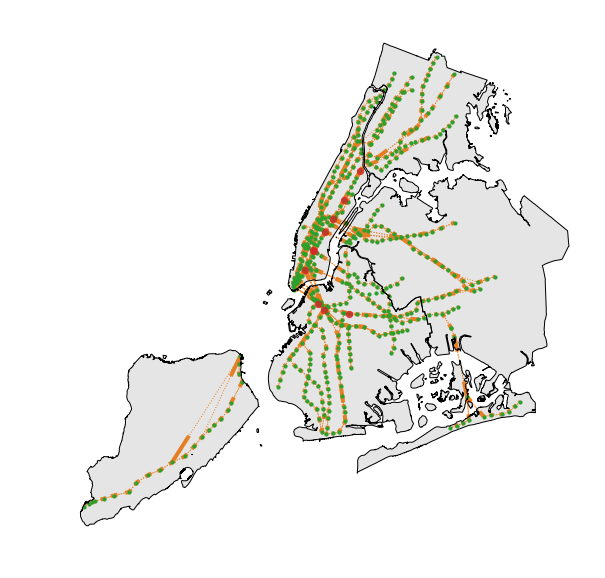

In [137]:
most_important(G,'betweenness')

[(1, '14 St - Union Sq'),
 (2, 'Canal St'),
 (3, '14 St - Union Sq'),
 (4, 'Grand Central - 42 St'),
 (5, '34 St - Herald Sq')]

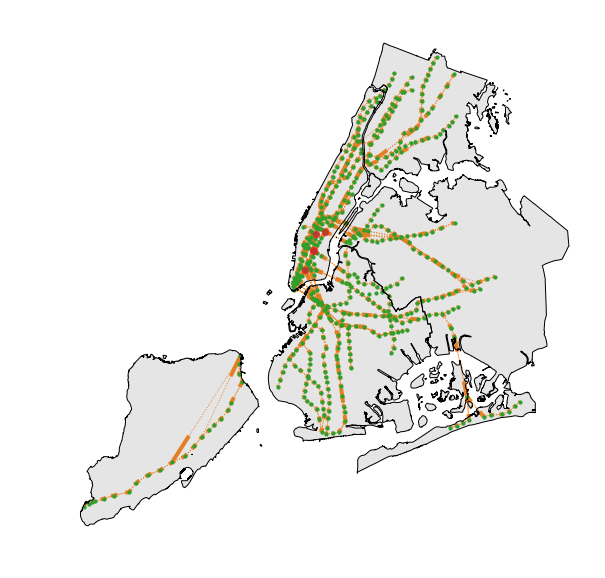

In [141]:
most_important(G,'closeness',5)

[(1, 'Times Sq - 42 St'),
 (2, 'Times Sq - 42 St'),
 (3, '42 St - Port Authority Bus Terminal'),
 (4, '34 St - Herald Sq'),
 (5, '14 St - Union Sq'),
 (6, '34 St - Herald Sq'),
 (7, 'W 4 St')]

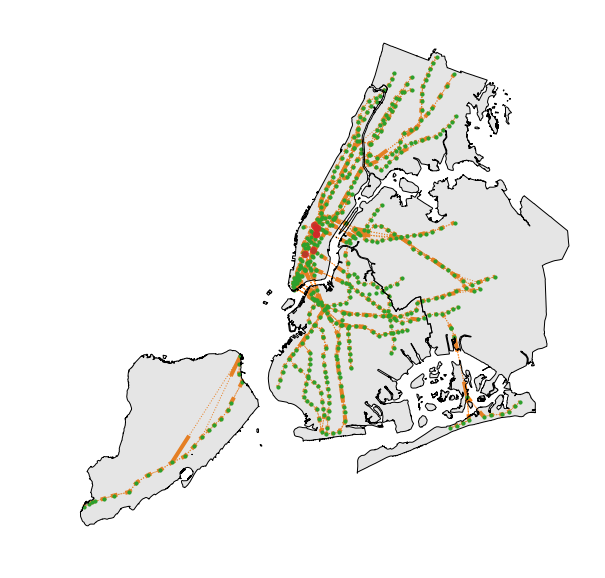

In [143]:
most_important(G,'degree',7)